In [1]:
# import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
# pip install pandas_ml
from pandas_ml import ConfusionMatrix
import numpy as np
# from sklearn import cross_validation as cv
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO 


In [2]:
path="D:\\Imarticus\\Python\\titanic.csv"
titanic = pd.read_csv(path)
titanic.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# print the columns
# --------------------------------------
col = list(titanic.columns)
print(col)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
# count of Rows and Columns 
# -----------------------------
titanic.shape
titanic.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

In [5]:
# total number of rows
# --------------------------------------
len(titanic.index)



891

In [6]:
# print the records for view
# --------------------------------------
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic = titanic.drop('Name', axis = 1)
titanic = titanic.drop('Cabin', axis = 1)
titanic = titanic.drop('Ticket', axis = 1)
titanic = titanic.drop('PassengerId', axis = 1)

In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:

print(titanic.SibSp.value_counts())
print(titanic.Parch.value_counts())
print(titanic.Embarked.value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
# need the Y-variable to be Numeric (0 and 1) for Logistic Regression
# steps:
# 1) create a new Y-variable and initialise with 0/1 appropriately
# 2) delete the old Y value 
# -----------------------------------------------------------------

titanic['Gender'] = 0
titanic.Gender[titanic.Sex == "male"] = 1
titanic.Gender[titanic.Sex == "female"] = 0

C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [14]:
titanic = titanic.drop('Sex',axis=1)

In [15]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [17]:
# get the count of "YES" (1) and "NO" (0)
# --------------------------------------
titanic['Survived'].value_counts()
titanic['Survived'].value_counts()/len(titanic)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

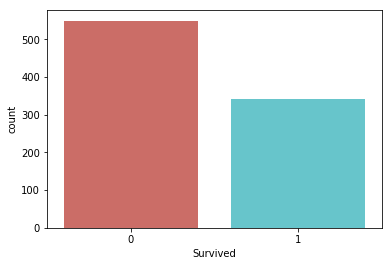

In [19]:
# plot the "Yes" and "No"
# --------------------------------------
sns.countplot(x = 'Survived', data = titanic, palette = 'hls')

In [22]:
titanic.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
titanic = titanic.dropna(subset = ['Embarked'])
titanic = titanic.dropna(subset = ['Age'])

In [23]:
pd.get_dummies(titanic.Embarked,drop_first=True).tail(20)
pd.get_dummies(titanic.Embarked,drop_first=False).head(20)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
10,0,0,1


In [25]:
#create the dummy variables
# for every column having more than 1 value, 
# create dummy variables
# this is done since there are characters in the factor variables
# ---------------------------------------------------------------



new_titanic = titanic.copy()

In [26]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [27]:
# Get all the factor X-variables

factor_x = titanic.select_dtypes(exclude=["int64","float64","category"]).columns.values
print(factor_x)


['Embarked']


In [28]:
# convert all X-categorical variables
# ---------------------------------
for c in factor_x:
    titanic[c] = titanic[c].astype('category',copy=False)
titanic.dtypes

Survived       int64
Pclass         int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Gender         int64
dtype: object

In [29]:
# del cat_list

for var in factor_x:
    cat_list = pd.get_dummies(titanic[var], drop_first=True, prefix=var)
    # data1=bank.join(cat_list)
    new_titanic = new_titanic.join(cat_list)

new_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [30]:
# old+dummy columns
new_col_set = new_titanic.columns
print(new_col_set)
len(new_col_set)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


10

In [31]:
# data with new columns
new_titanic.head()

# get the difference of new and old columns
to_keep = list(set(new_col_set).difference(set(factor_x)))
to_keep
to_keep.sort()
to_keep
len(to_keep)


9

In [32]:
# create the final dataset with the final columns set
# ---------------------------------------------------
titanic_final = new_titanic[to_keep]
titanic_final.head()
titanic_final.columns.sort_values()
len(titanic_final.columns)



9

In [33]:
# reordering the columns
# ---------------------------------------------------
titanic_final = pd.concat(
        [titanic_final['Survived'], 
        titanic_final.drop('Survived',axis=1)],
        axis=1)

titanic_final.columns


Index(['Survived', 'Age', 'Embarked_Q', 'Embarked_S', 'Fare', 'Gender',
       'Parch', 'Pclass', 'SibSp'],
      dtype='object')

In [34]:
import random as r


# split the dataset into train and test
# ---------------------------------------------------
train, test = train_test_split(titanic_final, test_size = 0.3)

print(train.shape)
print(test.shape)

(498, 9)
(214, 9)


In [35]:

total_cols = len(titanic_final.columns)
print(total_cols)

9


In [36]:
# split the train and test into X and Y variables
train_x = train.iloc[:,1:total_cols+1]
train_y = train.iloc[:,0]

In [37]:
train_x.iloc[0:5]

,Age,Embarked_Q,Embarked_S,Fare,Gender,Parch,Pclass,SibSp
112,22.0,0,1,8.0500,1,0,3,0
854,44.0,0,1,26.0000,0,0,2,1
211,35.0,0,1,21.0000,0,0,2,0
276,45.0,0,1,7.7500,0,0,3,0
843,34.5,0,0,6.4375,1,0,3,0


In [38]:
test_x  = test.iloc[:,1:total_cols+1]
test_y = test.iloc[:,0]
len(train_x)
len(test_x)


214

In [39]:
# build the base model with all columns
# -------------------------------------

# build the logistic regression model

logit_model = sm.Logit(train_y, train_x)
logit_result = logit_model.fit()
logit_result.summary2()


Optimization terminated successfully.
         Current function value: 0.472175
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.301     
Dependent Variable: Survived         AIC:              486.2865  
Date:               2019-03-16 21:08 BIC:              519.9713  
No. Observations:   498              Log-Likelihood:   -235.14   
Df Model:           7                LL-Null:          -336.26   
Df Residuals:       490              LLR p-value:      3.8530e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age           0.0089    0.0075    1.1758  0.2397  -0.0059   0.0237
Embarked_Q   -0.4436    0.6358   -0.6976  0.4854  -1.6897   0.8026
Embarked_S    0.2216    0.3141    0.7056  0.4805  -0.3939   0.8371
Fare          0.0212    0.0044    4.7753  0.0000   0.0125   0.0299
Gender       -2.5402    0.2538  -10.0098  0.0000  -3.0376  -2.0428
Parch        -0.1249    0.1433   -0.8719  0.3833  -0.4057   0.1559
Pclass        0.0685    0.1214    0.5641  0.5727  -0.1694   0.3063
SibSp        -0.2543    0.1547   -1.6442  0.1001  -0.5575   0.0488
=================================================================

"""

In [41]:
# cross-validation
# ----------------
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(train_x)
print(kf)
fold = 1

KFold(n_splits=5, random_state=None, shuffle=False)


In [42]:
# split the training further into train and test
for train_index, test_index in kf.split(train_x):
    
    cv_train_x = train_x.iloc[train_index,]
    cv_train_y = train_y.iloc[train_index,]
    
    cv_test_x = train_x.iloc[test_index,]
    cv_test_y = train_y.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_logit_model = sm.Logit(cv_train_y, cv_train_x).fit()
    cv_pdct = list(cv_logit_model.predict(cv_test_x))

    # set the default cut-off to 0.5
    # and set predictions to 0 and 1
    cv_length = len(cv_pdct)
    cv_results=list(cv_pdct).copy()
        
    for i in range(0,cv_length):
        if cv_pdct[i] <= 0.5:
            cv_results[i] = 0
        else:
            cv_results[i] = 1
    
    # accuracy score
    acc_score = accuracy_score(cv_test_y,cv_results)*100
    print('Fold={0},Accuracy={1}'.format(fold,acc_score) )
    
    fold+=1



Optimization terminated successfully.
         Current function value: 0.476116
         Iterations 6
Fold=1,Accuracy=82.0
Optimization terminated successfully.
         Current function value: 0.450528
         Iterations 7
Fold=2,Accuracy=72.0
Optimization terminated successfully.
         Current function value: 0.485506
         Iterations 7
Fold=3,Accuracy=83.0
Optimization terminated successfully.
         Current function value: 0.478537
         Iterations 7
Fold=4,Accuracy=82.82828282828282
Optimization terminated successfully.
         Current function value: 0.458434
         Iterations 7
Fold=5,Accuracy=75.75757575757575


In [45]:
# predict on the test set
# ---------------------------------------------------
pred_y = logit_result.predict(test_x)
y_results = list(pred_y)
pred_y
length = len(y_results)
length
# set the default cut-off to 0.5
# and set predictions to 0 and 1
for i in range(0,length):
    if y_results[i] <= 0.5:
        y_results[i] = 0
    else:
        y_results[i] = 1
        
# accuracy score
print("Accuracy",accuracy_score(test_y,y_results)*100)


Accuracy 71.02803738317756


In [46]:
# confusion matrix
cm=ConfusionMatrix(list(y_results),list(test_y))
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False        101    35      136
True          27    51       78
__all__      128    86      214
population: 214
P: 78
N: 136
PositiveTest: 86
NegativeTest: 128
TP: 51
TN: 101
FP: 35
FN: 27
TPR: 0.6538461538461539
TNR: 0.7426470588235294
PPV: 0.5930232558139535
NPV: 0.7890625
FPR: 0.25735294117647056
FDR: 0.4069767441860465
FNR: 0.34615384615384615
ACC: 0.7102803738317757
F1_score: 0.6219512195121951
MCC: 0.38922282671754815
informedness: 0.3964932126696832
markedness: 0.38208575581395365
prevalence: 0.3644859813084112
LRP: 2.540659340659341
LRN: 0.4661081492764661
DOR: 5.450793650793652
FOR: 0.2109375


In [47]:
# Classification report : precision, recall, F-score
print(cr(test_y, y_results))


              precision    recall  f1-score   support

           0       0.74      0.79      0.77       128
           1       0.65      0.59      0.62        86

   micro avg       0.71      0.71      0.71       214
   macro avg       0.70      0.69      0.69       214
weighted avg       0.71      0.71      0.71       214



In [48]:
# draw the ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(test_y, y_results)
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.6910428779069768


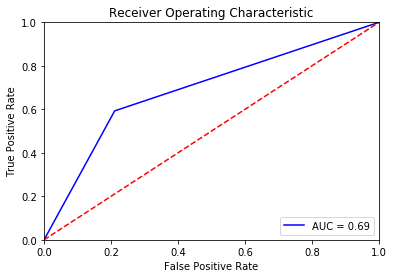

In [49]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [50]:
######## Decision Tree ##########################


# gini model
# entropy model
# -------------------------------------

# Model 1) DT with gini index criteria
# -------------------------------------
clf_gini = dtc(criterion = "gini", random_state = 100, 
               max_depth=3, min_samples_leaf=5)

fit1 = clf_gini.fit(train_x, train_y)
print(fit1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


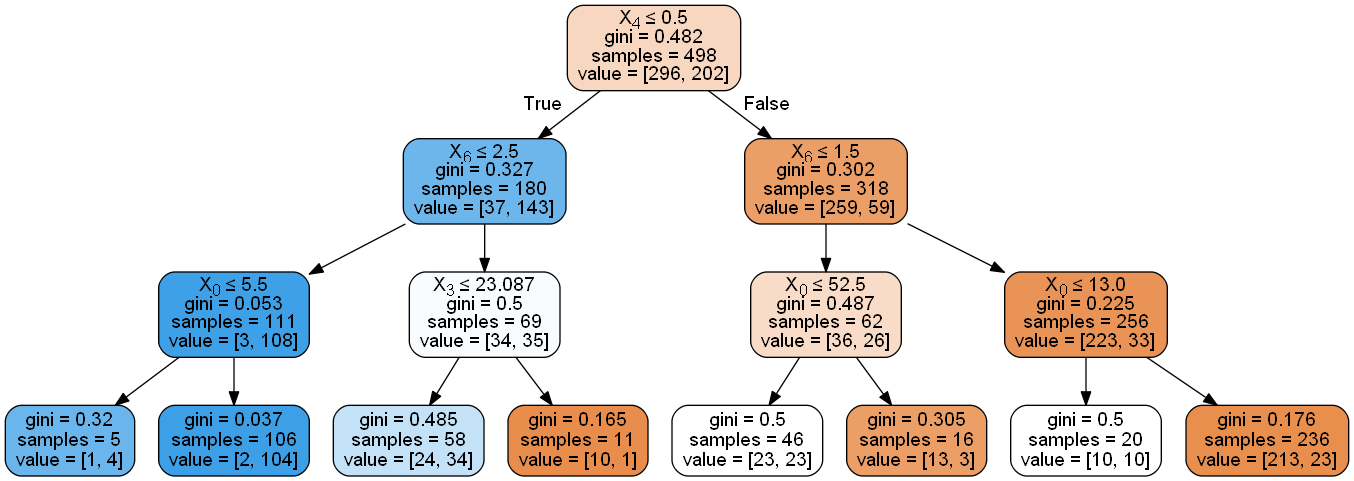

In [51]:
# to view the graph
from sklearn import tree
# tree visualisation
# -------------------------------------
dot_data = StringIO()

tree.export_graphviz(fit1, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True)
import pydotplus

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image

Image(graph.create_png())


In [52]:
# predictions
# -------------------------------------
pred_gini = fit1.predict(test_x)
len(test_x)
pred_gini
len(test_y)
len(pred_gini)
print("Gini Accuracy is ", 
      accuracy_score(test_y,pred_gini)*100)


Gini Accuracy is  74.29906542056075


In [53]:
# create dataframe with the actual and predicted results
# -------------------------------------------------------
df_results1 = pd.DataFrame({'actual':test_y, 
                            'predicted':pred_gini})
df_results1
len(df_results1)

214

population: 214
P: 86
N: 128
PositiveTest: 71
NegativeTest: 143
TP: 51
TN: 108
FP: 20
FN: 35
TPR: 0.5930232558139535
TNR: 0.84375
PPV: 0.7183098591549296
NPV: 0.7552447552447552
FPR: 0.15625
FDR: 0.28169014084507044
FNR: 0.4069767441860465
ACC: 0.7429906542056075
F1_score: 0.6496815286624203
MCC: 0.4547922500846641
informedness: 0.43677325581395365
markedness: 0.47355461439968494
prevalence: 0.40186915887850466
LRP: 3.7953488372093025
LRN: 0.48234280792420325
DOR: 7.868571428571429
FOR: 0.24475524475524477


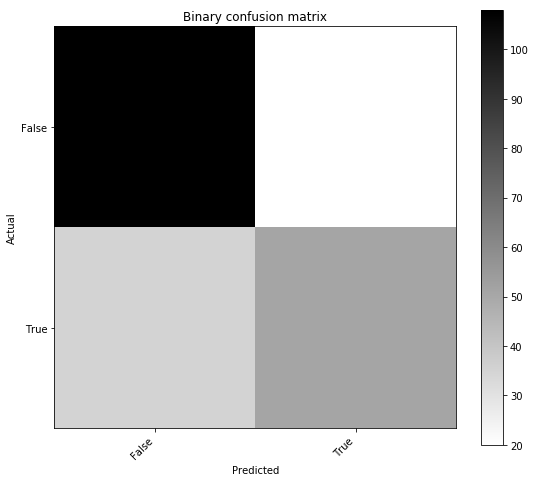

In [54]:
# another nice way to plot the results
# -------------------------------------
cm1=ConfusionMatrix(list(test_y), list(pred_gini))
cm1
# plot
# -------------------------------------
cm1
cm1.plot()
cm1.print_stats()

In [55]:
################################
#Model 2) DT with Entropy(Information Gain) criteria
# ----------------------------------------------------
clf_entropy=dtc(criterion="entropy", 
                random_state=100, max_depth=3, 
                min_samples_leaf=5)

fit2 = clf_entropy.fit(train_x,train_y)
print(fit2)

pred_entropy = fit2.predict(test_x)

pred_entropy
len(test_y)
len(pred_entropy)
print("Entropy Accuracy is ", 
      accuracy_score(test_y,pred_entropy)*100)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')
Entropy Accuracy is  74.29906542056075


population: 214
P: 86
N: 128
PositiveTest: 71
NegativeTest: 143
TP: 51
TN: 108
FP: 20
FN: 35
TPR: 0.5930232558139535
TNR: 0.84375
PPV: 0.7183098591549296
NPV: 0.7552447552447552
FPR: 0.15625
FDR: 0.28169014084507044
FNR: 0.4069767441860465
ACC: 0.7429906542056075
F1_score: 0.6496815286624203
MCC: 0.4547922500846641
informedness: 0.43677325581395365
markedness: 0.47355461439968494
prevalence: 0.40186915887850466
LRP: 3.7953488372093025
LRN: 0.48234280792420325
DOR: 7.868571428571429
FOR: 0.24475524475524477


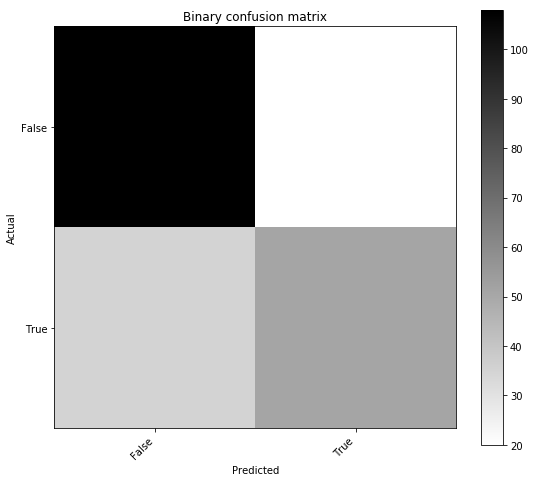

In [56]:
df_results2 = pd.DataFrame({'actual':test_y, 
                            'predicted':pred_entropy})
df_results2

# another nice way to plot the results
# -------------------------------------
cm2=ConfusionMatrix(list(test_y), list(pred_entropy))
cm2

# plot
# -------------------------------------
cm2.plot()
cm2.print_stats()